Partie 1: Mécanique céleste

In [2]:
import numpy as np
from astropy.constants import G, M_earth, M_sun 
import matplotlib.pyplot as plt
import de421
from astropy.time import Time
from jplephem import Ephemeris

a) Implémentation de la méthode de Verlet 

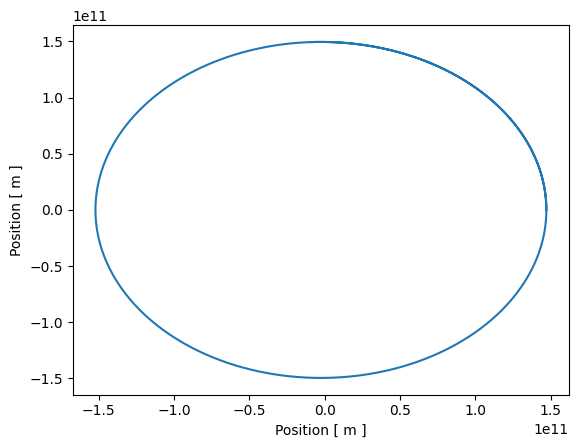

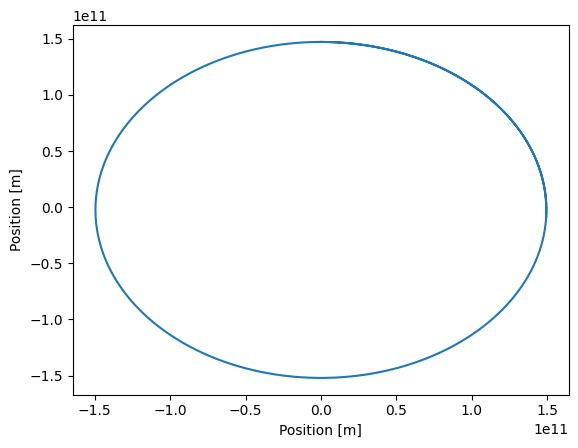

In [3]:
r_0 = 1.4710e11 # m
v_0 = 3.0287e4 #m/s

def f(r):
    return(-G.value * M_sun.value * r/np.linalg.norm(r)**3)
    
def verlet(r, v_1, h, max):
    
    vx=[v_1[0]]
    vy=[v_1[1]]
    x = [r[0]]
    y =[r[1]]
    
    for i in range(1, max):
        r = r + h * v_1
        k = h * f(r)
        v_2 = v_1 + 0.5 * k 
        v_1 = v_1 + k
        vx.append(v_2[0])
        vy.append(v_2[1])
        x.append(r[0])
        y.append(r[1])
             
    
    return(x,y,vx,vy)
    
    #Représentation de différents orbites (les conditions initiales varient)
    
max = 11000 # nombres d'itérations maximales
h = 3600 
r = np.array([r_0, 0])
v_1 =  np.array([0,v_0]) + 0.5 * h * f(r)
x, y, vx, vy = verlet(r, v_1, h, max) # le pas correspond a un incrément temporel de 1h en secondes 
plt.figure()
plt.plot(x, y)
plt.ylabel("Position [ m ]")
plt.xlabel("Position [ m ]")
plt.show()
    
    
r = np.array([0, r_0])
v_1 =  np.array([v_0,0]) + 0.5 * h * f(r)
xverlet, yverlet, vxverlet,vyverlet = verlet(r, v_1, h, max)
plt.figure()
plt.plot(xverlet, yverlet)
plt.ylabel("Position [m]")
plt.xlabel("Position [m]")
plt.show()

B) Méthode de Verlet en calculant l'énergie

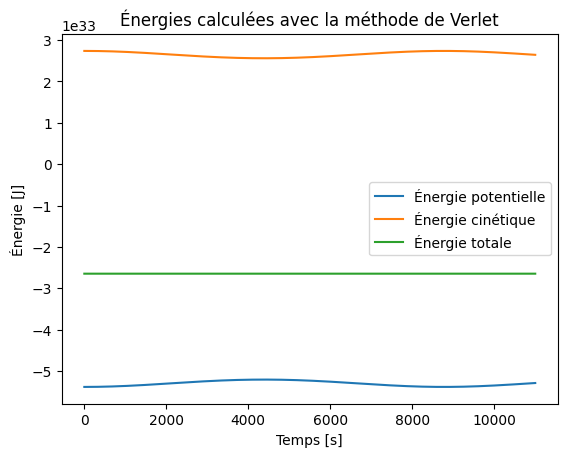

In [4]:
def verletenergie(r, v_1, h, max):
    U = [-G.value*M_sun.value*M_earth.value/np.linalg.norm(r)]
    E_k = [1/2*M_earth.value*np.linalg.norm(v_1)**2]
    E_tot = [U[0]+E_k[0]]
    
    vx=[v_1[0]]
    vy=[v_1[1]]
    x = [r[0]]
    y =[r[1]]
    
    for i in range(1, max):
        r = r + h * v_1
        k = h * f(r)
        v_2 = v_1 + 0.5 * k 
        v_1 = v_1 + k
        vx.append(v_2[0])
        vy.append(v_2[1])
        x.append(r[0])
        y.append(r[1])
    
        E_k.append(1/2*M_earth.value*np.linalg.norm(v_2)**2)
        U.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r))
        E_tot.append(U[i] + E_k[i])
    
    return(E_k,U, E_tot)
    
    
    
r = np.array([r_0, 0])
v_1 =  np.array([0,v_0]) + 0.5 * h * f(r)
E_k, U, E_tot = verletenergie(r, v_1, 3600, max)
    
    
plt.figure()
plt.plot(range(max),U, label = "Énergie potentielle")
plt.plot(range(max), E_k, label = "Énergie cinétique")
plt.plot(range(max), E_tot, label = "Énergie totale")
plt.title("Énergies calculées avec la méthode de Verlet")
plt.ylabel("Énergie [J]")
plt.xlabel("Temps [s]")
plt.legend()
plt.show()

Commentaire blah blah blah blah

C) Méthode d'Euler, RK2, RK4

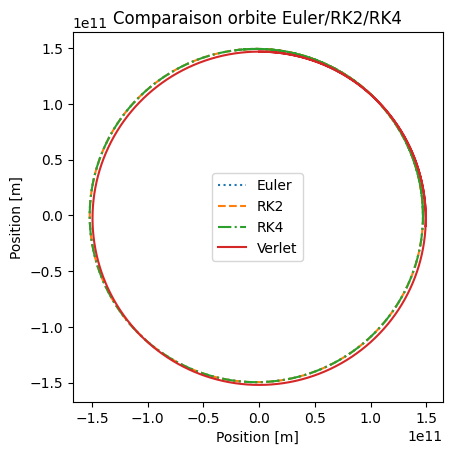

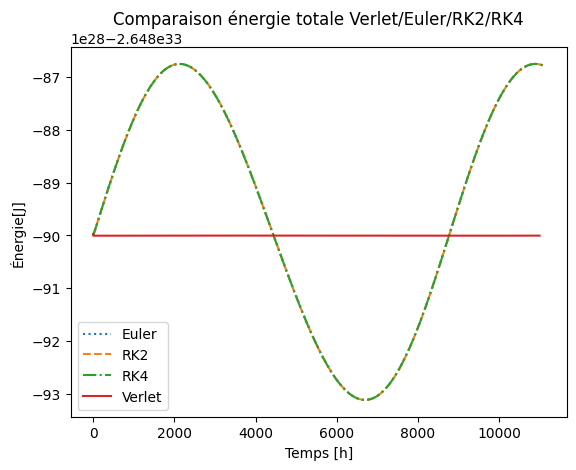

In [5]:
def Euler(a, b, h, r_0, v_0): 
    tpoints = np.arange(a,b,h)
    x = []
    y = []
    vx = []
    vy = [] 
    E_tot = []
    r = np.array([r_0, 0]) 
    v = np.array([0, v_0]) 


    for t in tpoints: 
        x.append(r[0])
        y.append(r[1])
        vx.append(v[0])
        vy.append(v[1])
        E_tot.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r) + 1/2*M_earth.value*np.linalg.norm(v)**2)
        v += h * f(r)
        r = r + h*v
        

    return(tpoints, x, y, vx, vy,  E_tot) 

def RK2(a, b, h, r_0, v_0): 
    tpoints = np.arange(a,b,h)
    x = []
    y = []
    vx = []
    vy = [] 
    E_tot = []
    r = np.array([r_0, 0]) 
    v = np.array([0, v_0]) 

    for t in tpoints: 
        x.append(r[0])
        y.append(r[1])
        vx.append(v[0])
        vy.append(v[1])
        E_tot.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r) + 1/2*M_earth.value*np.linalg.norm(v)**2)
        k1 = h * f(r)
        k2 = h * f(r+0.5*k1)
        v += k2
        r = r + h*v

    return(tpoints,x, y, vx, vy,  E_tot)

def RK4(a, b, h, r_0, v_0): 
    tpoints = np.arange(a,b,h)
    x = []
    y = []
    vx = []
    vy = [] 
    E_tot = []
    r = np.array([r_0, 0]) 
    v = np.array([0, v_0]) 
    for t in tpoints: 
        x.append(r[0])
        y.append(r[1])
        vx.append(v[0])
        vy.append(v[1])   
        E_tot.append(-G.value*M_sun.value*M_earth.value/np.linalg.norm(r) + 1/2*M_earth.value*np.linalg.norm(v)**2)
       
        k1 = h * f(r)
        k2 = h * f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        v += (k1+2*k2+2*k3+k4)/6
        r = r + h*v
    return(tpoints,x, y, vx, vy,  E_tot)

r = np.array([r_0, 0])
v_1 =  np.array([0,v_0]) + 0.5 * h * f(r)
E_k, U, E_totVerlet = verletenergie(r, v_1, 3600, max)
tRK2, xRK2,yRK2, vxRK2, vyRK2, ERK2 = RK2(0, 40000000, 3600, r_0, v_0)
tRK4, xRK4,yRK4, vxRK4, vyRK4, ERK4 = RK4(0, 40000000, 3600, r_0, v_0)
tEuler, xEuler,yEuler, vxEuler,vyEuler, EEuler = Euler(0, 40000000, 3600, r_0, v_0)
temps = [x/3600 for x in tEuler]

plt.figure()
plt.title("Comparaison orbite Euler/RK2/RK4")
plt.ylabel("Position [m]")
plt.xlabel("Position [m]")
plt.plot(xEuler,yEuler, label = "Euler", linestyle = "dotted")
plt.plot(xRK2,yRK2, label = "RK2", linestyle = "dashed")
plt.plot(xRK4,yRK4, label = "RK4", linestyle = "dashdot")
plt.plot(xverlet, yverlet, label="Verlet")
plt.gca().set_aspect("equal")
plt.legend()
plt.show()


plt.figure()
plt.title("Comparaison énergie totale Verlet/Euler/RK2/RK4")
plt.ylabel("Énergie[J]")
plt.xlabel("Temps [h]")
plt.plot(temps,EEuler, label = "Euler", linestyle = "dotted")
plt.plot(temps,ERK2, label = "RK2", linestyle = "dashed")
plt.plot(temps,ERK4, label = "RK4", linestyle = "dashdot")
plt.plot(range(max),E_totVerlet, label = "Verlet")
plt.legend()
plt.show()

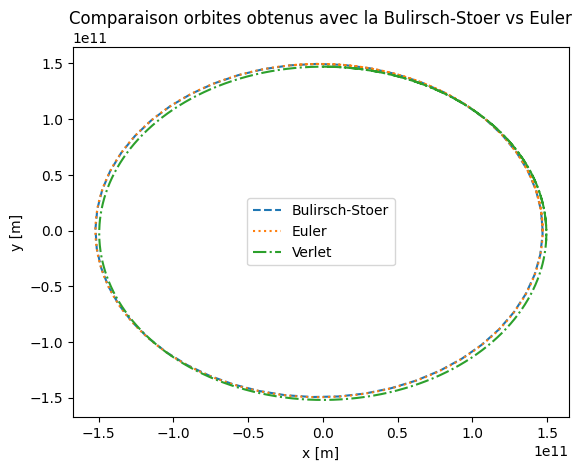

In [11]:
#d) Bulirsch-Stoer
def f(x, y):
    return(-G.value * M_sun.value * x/((x**2+y**2)**0.5)**3, -G.value * M_sun.value * y/((x**2+y**2)**0.5)**3)
    
def g(rx, ry):
    x = rx[0]
    vx = rx[1]
    y = ry[0]
    vy = ry[1]
    fx=vx
    fvx=f(x, y)[0]
    fy=vy
    fvy=f(x, y)[1]
    return np.array([fx, fvx, fy, fvy],float)

def Bulirsch(a, b, H, r_0, v_0, delta):
    tpoints = np.arange(a, b, H)
    x = []
    y = []
    rx = np.array([r_0, 0.0], float)
    ry = np.array([0, v_0], float)
    
    for t in tpoints:
        x.append(rx[0])
        y.append(ry[0])
        vx.append(rx[1])
        vy.append(ry[1])
        n = 1

        r1x = rx + 0.5*H*g(rx, ry)[0:2]
        r1y = ry + 0.5*H*g(rx, ry)[2:4]
        r2x = rx + H*g(r1x, r1y)[0:2]
        r2y = ry + H*g(r1x, r1y)[2:4]

        R1x = np.empty([1,2],float)
        R1x[0] = 0.5*(r1x+r2x+0.5*H*g(r2x, r2y)[0:2])




        R1y = np.empty([1,2],float)
        R1y[0] = 0.5*(r1y+r2y+0.5*H*g(r2x, r2y)[2:4])
    
        errorx = errory = 2*H*delta
        while errorx > H*delta and errory > H*delta:
            n += 1
            h = H/n
    
            r1x = rx + 0.5*h*g(rx, ry)[0:2]
            r1y = ry + 0.5*h*g(rx, ry)[2:4]
            r2x = rx + h*g(r1x, r1y)[0:2]
            r2y = ry + h*g(r1x,r1y)[2:4]
    
            for i in range(n-1):
                r1x += h*g(r2x, r2y)[0:2]
                r1y += h*g(r2x ,r2y)[2:4]
                r2x += h*g(r1x, r1y)[0:2]
                r2y += h*g(r1x ,r1y)[2:4]
    
            R2x = R1x
            R2y = R1y
    
            R1x = np.empty([n,2], float)
            R1x[0] = 0.5*(r1x+r2x+0.5*h*g(r2x, r2y)[0:2])
            R1y = np.empty([n,2], float)
            R1y[0] = 0.5*(r1y+r2y+0.5*h*g(r2x ,r2y)[2:4])
    
            for m in range (1, n):
                epsilonx = (R1x[m-1]-R2x[m-1])/((n/(n-1))**(2*m)-1)
                R1x[m] = R1x[m-1] + epsilonx
                epsilony = (R1y[m-1]-R2y[m-1])/((n/(n-1))**(2*m)-1)
                R1y[m] = R1y[m-1] + epsilony
            errorx = abs(epsilonx[0])
            errory = abs(epsilony[0])
    
        rx = R1x[n-1]
        ry = R1y[n-1]                    
    return(x,y,vx, vy, tpoints)
    
r_0 = 1.4710e11 # m
v_0 = 3.0287e4 #m/s
    
xBur, yBur,vxbur, vybur, tBur = Bulirsch(0, 32500000, 3600*24*7, r_0, v_0, 1000/(365*24*3600))

plt.title("Comparaison orbites obtenus avec la Bulirsch-Stoer vs Euler")
plt.plot(xBur, yBur, label = "Bulirsch-Stoer", linestyle="dashed")
plt.plot(xEuler, yEuler, label="Euler", linestyle="dotted")
plt.plot(xverlet, yverlet, label="Verlet", linestyle="dashdot")
plt.ylabel("y [m]")
plt.xlabel("x [m]")
plt.legend()
plt.show()

e) Bulirsch-Stoer en 3D pour trouver l'orbite de mars 

C:\Users\gaelm\AppData\Local\Temp\ipykernel_10468\2129300044.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r_0x = float(position[0]*1000)
C:\Users\gaelm\AppData\Local\Temp\ipykernel_10468\2129300044.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v_0x = float(velocity[0]/86.4)
C:\Users\gaelm\AppData\Local\Temp\ipykernel_10468\2129300044.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  r_0y = float(position[1]*1000)
C:\Users\gaelm\AppData\Local\Temp\

position théorique = [2.35763766e+11] m
position calculé = 232784877894.36557 m
différence: 2 %


C:\Users\gaelm\AppData\Local\Temp\ipykernel_10468\2129300044.py:141: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"différence: {100 - int(position_bulirsch/position_fin*100)} %")


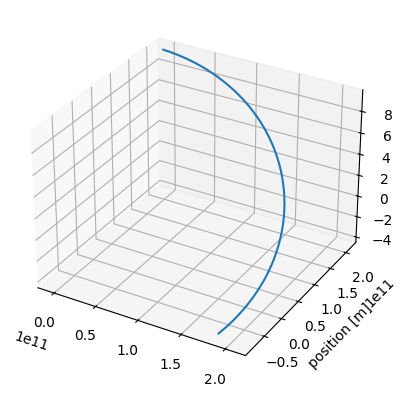

In [13]:
eph = Ephemeris(de421)

# dates,
lancement=Time("2020-07-30")
atterissage=Time("2021-02-18")

# un nombre de jours juliens est attendu par la routine, d’o`u le .jd,
# position en km, vitesse en km par jour,
position, velocity = eph.position_and_velocity('mars',lancement.jd)



r_0x = float(position[0]*1000)
v_0x = float(velocity[0]/86.4)

r_0y = float(position[1]*1000)
v_0y = float(velocity[1]/86.4)

r_0z = float(position[2]*1000)
v_0z = float(velocity[2]/86.4)

#modification de l'équation f(x) en 3D
def f(x, y, z):
    return(-G.value * M_sun.value * x/((x**2+y**2+z**2)**0.5)**3, -G.value * M_sun.value * y/((x**2+y**2+z**2)**0.5)**3, -G.value * M_sun.value * z/((x**2+y**2+z**2)**0.5)**3)


# Implémentation de la méthode de Bulirsch-Stoer en 3D  
def g(rx, ry, rz):
    x = rx[0]
    vx = rx[1]
    y = ry[0]
    vy = ry[1]
    z = rz[0]
    vz = rz[1]
    fx=vx
    fvx=f(x, y, z)[0]
    fy=vy
    fvy=f(x, y, z)[1]
    fz=vz
    fvz=f(x, y, z)[2]
    return np.array([fx, fvx, fy, fvy, fz, fvz],float)

def Bulirsch3D(a, b, H, r_0x, v_0x, r_0y, v_0y, r_0z, v_0z, delta):
    tpoints = np.arange(a, b, H)
    x = []
    y = []
    z = []
    vz = []
    rx = np.array([r_0x, v_0x], float)
    ry = np.array([r_0y, v_0y], float)
    rz = np.array([r_0z, v_0z], float) 
    
    for t in tpoints:
        x.append(rx[0])
        y.append(ry[0])
        z.append(rz[0])
        vx.append(rx[1])
        vy.append(ry[1])
        vz.append(rz[1])
        n = 1

        r1x = rx + 0.5*H*g(rx, ry, rz)[0:2]
        r1y = ry + 0.5*H*g(rx, ry, rz)[2:4]
        r1z = rz + 0.5*H*g(rx, ry, rz)[4:6]
        r2x = rx + H*g(r1x, r1y, r1z)[0:2]
        r2y = ry + H*g(r1x, r1y, r1z)[2:4]
        r2z = rz + H*g(r1x, r1y, r1z)[4:6]

        R1x = np.empty([1,2],float)
        R1x[0] = 0.5*(r1x+r2x+0.5*H*g(r2x, r2y, r2z)[0:2])




        R1y = np.empty([1,2],float)
        R1y[0] = 0.5*(r1y+r2y+0.5*H*g(r2x, r2y, r2z)[2:4])

        R1z = np.empty([1,2],float)
        R1z[0] = 0.5*(r1z+r2z+0.5*H*g(r2x, r2y, r2z)[2:4])
    
        errorx = errory = errorz = 2*H*delta
        while errorx > H*delta and errory > H*delta and errorz > H*delta:
            n += 1
            h = H/n
    
            r1x = rx + 0.5*h*g(rx, ry, rz)[0:2]
            r1y = ry + 0.5*h*g(rx, ry, rz)[2:4]
            r1z = rz + 0.5*h*g(rx, ry, rz)[4:6]
            r2x = rx + h*g(r1x,r1y,r1z)[0:2]
            r2y = ry + h*g(r1x,r1y,r1z)[2:4]
            r2z = rz + h*g(r1x,r1y,r1z)[4:6]
    
            for i in range(n-1):
                r1x += h*g(r2x, r2y, r2z)[0:2]
                r1y += h*g(r2x ,r2y, r2z)[2:4]
                r1z += h*g(r2x ,r2y, r2z)[4:6]
                r2x += h*g(r1x, r1y, r2z)[0:2]
                r2y += h*g(r1x ,r1y, r2z)[2:4]
                r2z += h*g(r1x ,r1y, r2z)[4:6]
    
            R2x = R1x
            R2y = R1y
            R2z = R1z
    
            R1x = np.empty([n,2], float)
            R1x[0] = 0.5*(r1x+r2x+0.5*h*g(r2x, r2y, r2z)[0:2])
            R1y = np.empty([n,2], float)
            R1y[0] = 0.5*(r1y+r2y+0.5*h*g(r2x ,r2y, r2z)[2:4])
            R1z = np.empty([n,2], float)
            R1z[0] = 0.5*(r1z+r2z+0.5*h*g(r2x ,r2y, r2z)[4:6])
    
            for m in range (1, n):
                epsilonx = (R1x[m-1]-R2x[m-1])/((n/(n-1))**(2*m)-1)
                R1x[m] = R1x[m-1] + epsilonx
                epsilony = (R1y[m-1]-R2y[m-1])/((n/(n-1))**(2*m)-1)
                R1y[m] = R1y[m-1] + epsilony
                epsilonz = (R1z[m-1]-R2z[m-1])/((n/(n-1))**(2*m)-1)
                R1z[m] = R1z[m-1] + epsilonz
            errorx = abs(epsilonx[0])
            errory = abs(epsilony[0])
            errorz = abs(epsilonz[0])
    
        rx = R1x[n-1]
        ry = R1y[n-1]     
        rz = R1z[n-1]                
    return(x,y,z,vx,vy,vz, tpoints)

xBur, yBur, zBur, vxbur, vybur, vzbur, tBur = Bulirsch3D(0, 203*24*60*60, 30000, r_0x, v_0x, r_0y, v_0y, r_0z, v_0z, 900/(365*24*3600))


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(xBur, yBur, zBur)

position_fin = eph.position('mars',atterissage.jd)
position_fin = (((position_fin[0]**2)+(position_fin[1]**2)+(position_fin[2]**2))**0.5)*1000
print(f"position théorique = {position_fin} m")
position_bulirsch = (xBur[-1]**2+yBur[-1]**2+zBur[-1]**2)**0.5
print(f"position calculé = {position_bulirsch} m")
print(f"différence: {100 - int(position_bulirsch/position_fin*100)} %")